In [83]:
import pickle
import xarray as xr
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [84]:
result_dir = './results'


In [85]:
ceiling_xrs = []
for name in glob.glob('./results/ceiling_*.pkl'):
    with open(name, 'rb') as f:
        ceiling_xr = pickle.load(f)
        ceiling_xrs.append({"xr": ceiling_xr, "prop": float(name.split('_')[1])})

        

In [86]:
ceilings = np.zeros((ceiling_xrs[0]['xr'].raw.shape[1], len(ceiling_xrs)))
props = np.zeros(len(ceiling_xrs))
for i in range(len(ceiling_xrs)):
    ceilings[:,i] = ceiling_xrs[i]['xr'].raw.mean(dim='split')
    props[i] = ceiling_xrs[i]['prop']

In [87]:
ceilings

array([[0.29680517, 0.08542356, 0.24074397, ..., 0.26404848, 0.1571573 ,
        0.04242785],
       [0.7955733 , 0.45807246, 0.7470274 , ..., 0.77029635, 0.63362656,
        0.31555416],
       [0.70864717, 0.32607508, 0.65078364, ..., 0.67706115, 0.51604014,
        0.21263026],
       ...,
       [0.88638057, 0.61731442, 0.85641042, ..., 0.87064673, 0.77432445,
        0.46935976],
       [0.81951313, 0.48786221, 0.77704918, ..., 0.79645118, 0.66960146,
        0.34376838],
       [0.82155203, 0.49049237, 0.77848795, ..., 0.79743171, 0.67006566,
        0.34853816]])

In [88]:
inds = props.argsort()
ceilings = ceilings[:,inds[::-1]]
props = props[inds[::-1]]

In [89]:
ceilings

array([[0.32307816, 0.29680517, 0.26404848, ..., 0.11576835, 0.08542356,
        0.04242785],
       [0.80843552, 0.7955733 , 0.77029635, ..., 0.58144456, 0.45807246,
        0.31555416],
       [0.72499749, 0.70864717, 0.67706115, ..., 0.45036142, 0.32607508,
        0.21263026],
       ...,
       [0.89439582, 0.88638057, 0.87064673, ..., 0.73477075, 0.61731442,
        0.46935976],
       [0.83131198, 0.81951313, 0.79645118, ..., 0.61288991, 0.48786221,
        0.34376838],
       [0.83502338, 0.82155203, 0.79743171, ..., 0.62417434, 0.49049237,
        0.34853816]])

In [92]:
k = props[2]/props[0]

k * ceilings[2,0]/ (1+(k-1)*ceilings[2,0])

0.6783598243647403

In [94]:
def get_function(last_ceiling, last_prop):
    def my_function(new_prop):
        k = new_prop/last_prop
        new_ceiling = k*last_ceiling/(1+(k-1)*last_ceiling)
        return new_ceiling
        
    return my_function

x = np.linspace(0,0.5,100)
my_function = get_function(ceilings[0,0], props[0])
my_function(x)
    

array([0.        , 0.00479783, 0.00954985, 0.0142567 , 0.01891902,
       0.02353745, 0.0281126 , 0.03264508, 0.03713548, 0.04158438,
       0.04599236, 0.05035998, 0.05468779, 0.05897633, 0.06322614,
       0.06743774, 0.07161163, 0.07574833, 0.07984832, 0.08391211,
       0.08794015, 0.09193293, 0.0958909 , 0.09981452, 0.10370423,
       0.10756047, 0.11138367, 0.11517425, 0.11893263, 0.12265922,
       0.12635442, 0.13001861, 0.13365221, 0.13725557, 0.14082909,
       0.14437312, 0.14788804, 0.15137419, 0.15483194, 0.15826162,
       0.16166358, 0.16503816, 0.16838567, 0.17170645, 0.17500082,
       0.17826908, 0.18151155, 0.18472853, 0.18792033, 0.19108723,
       0.19422952, 0.1973475 , 0.20044144, 0.20351161, 0.2065583 ,
       0.20958178, 0.21258229, 0.21556011, 0.2185155 , 0.2214487 ,
       0.22435996, 0.22724953, 0.23011765, 0.23296456, 0.23579049,
       0.23859568, 0.24138035, 0.24414472, 0.24688902, 0.24961346,
       0.25231827, 0.25500364, 0.25766979, 0.26031693, 0.26294

<IPython.core.display.Javascript object>


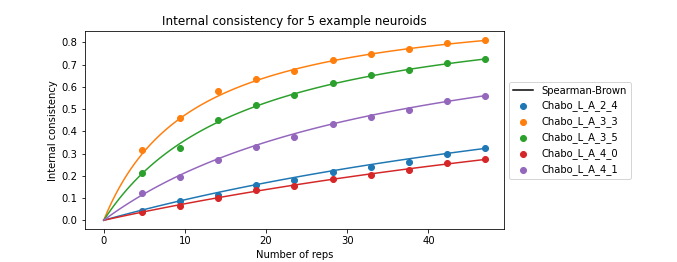

Text(0.5, 1.0, 'Internal consistency for 5 example neuroids')

In [128]:
%matplotlib notebook

fig = plt.figure()
ax = plt.subplot(111)


for index in range(5):
    ax.scatter(props*2*47, ceilings[index,:], label = ceiling_xrs[index]["xr"].raw.neuroid_id.values[index])
    ax.plot(x*2*47, get_function(ceilings[index,0], props[0])(x))

ax.plot(0, 0, label='Spearman-Brown', color='black')
ax.set_xlabel('Number of reps')
ax.set_ylabel('Internal consistency')

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_title('Internal consistency for 5 example neuroids')


#plt.legend(loc='center left')

In [112]:
ceiling_xrs[index]["xr"].raw.neuroid_id.values[index]

'Chabo_L_A_4_1'